In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
fec = pd.read_csv('data/P00000001-ALL.csv')

d:\work\hello-pandas\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fec[:3]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073


In [5]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [6]:
unique_cands = fec.cand_nm.unique()

In [7]:
unique_cands[2]

'Obama, Barack'

In [8]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [9]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [10]:
fec['party'] = fec.cand_nm.map(parties)

In [11]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [12]:
(fec.contb_receipt_amt > 0).value_counts() # 还有一些是退款的

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [13]:
fec = fec[fec.contb_receipt_amt > 0]

In [14]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])] # 只关注两位主要的候选人

In [15]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [16]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

In [17]:
f = lambda x: occ_mapping.get(x, x) # 如果没有在 mapping 中指定，就返回原值~

In [18]:
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [19]:
fec.contbr_occupation.value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [20]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [21]:
f = lambda x: emp_mapping.get(x, x)

In [22]:
fec.contbr_employer = fec.contbr_employer.map(f)

In [23]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party', aggfunc='sum')

In [24]:
over_2m = by_occupation[by_occupation.sum(1) > 2000000]

In [25]:
over_2m

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


In [26]:
%matplotlib notebook

In [27]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


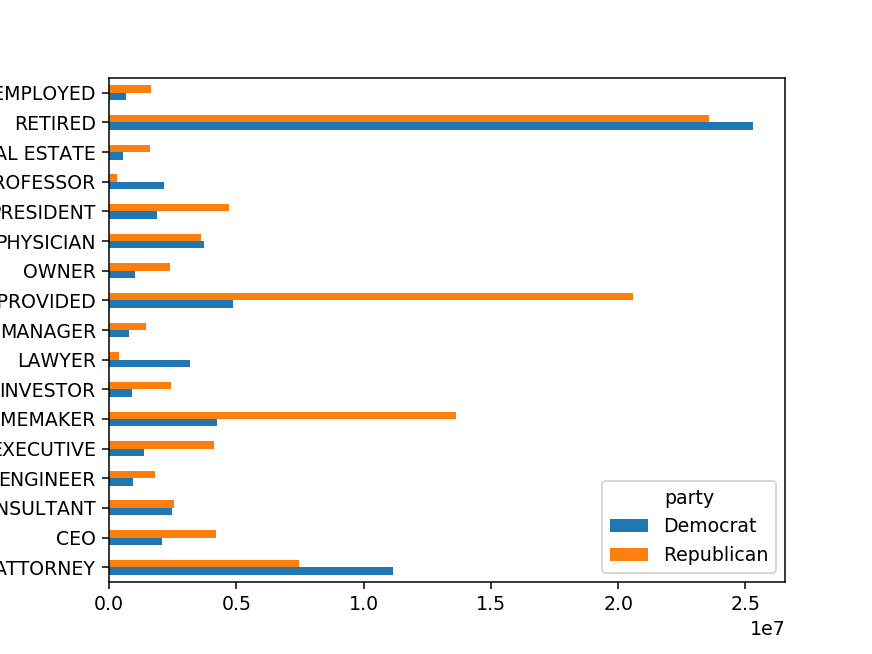

In [28]:
over_2m.plot(kind='barh')

In [29]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [30]:
grouped = fec_mrbo.groupby('cand_nm')

In [31]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [32]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [33]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [34]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [35]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [36]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [37]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [38]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [39]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [40]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [41]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<IPython.core.display.Javascript object>


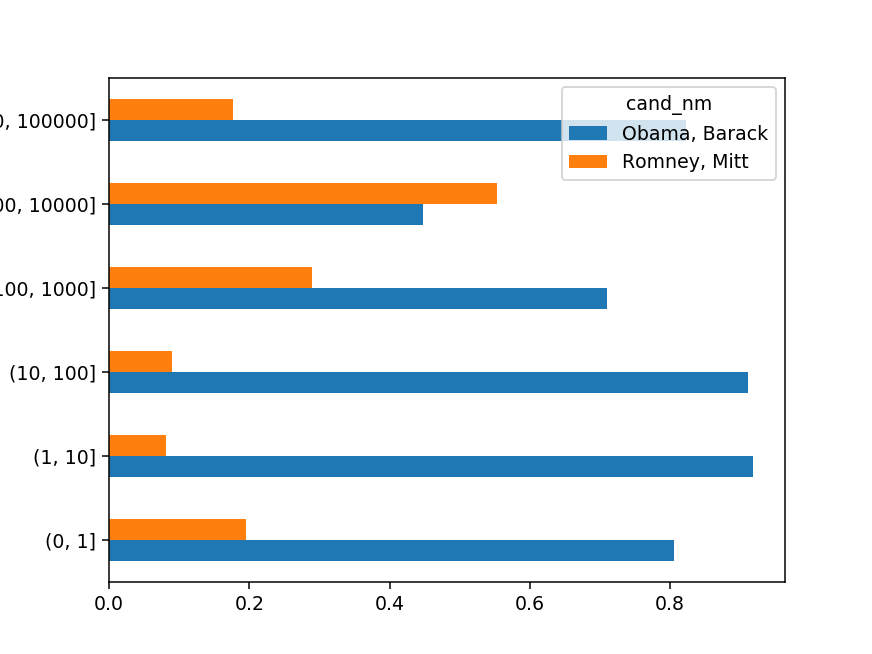

In [42]:
normed_sums[:-2].plot(kind='barh')

In [43]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [44]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [45]:
totals = totals[totals.sum(1) > 100000]

In [47]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [48]:
percent = totals.div(totals.sum(1), axis=0)

In [49]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
